### 导入库

In [1]:
from pyspark import SparkConf, SparkContext

In [2]:
sc =SparkContext.getOrCreate()

### 创建RDD

In [3]:
data = sc.parallelize([('Amber', 22),
                       ('Alfred', 23),
                       ('Skye',4),
                       ('Albert', 12),
                       ('Amber', 9)])

data
print(data)

ParallelCollectionRDD[0] at parallelize at PythonRDD.scala:175


### .collect()函数：执行把全部数据集送回驱动的操作

In [4]:
data_heterogenous = sc.parallelize([('Ferrari', 'fast'),
                                    {'Porsche': 100000},
                                    ['Spain', 'visited', 4504]
                                   ]).collect()
#.collect()执行把该数据集送回驱动的操作

data_heterogenous

[('Ferrari', 'fast'), {'Porsche': 100000}, ['Spain', 'visited', 4504]]

### 索引其中某一个数值

In [5]:
data_heterogenous[1]['Porsche']

100000

### 读入压缩包文件

In [6]:
data_from_file = sc.textFile(r'D:\小鸡理财\OneDrive\python\book\PySpark实战指南\VS14MORT.txt.gz',4)
#4代表被划分为4个分区

data_from_file

D:\小鸡理财\OneDrive\python\book\PySpark实战指南\VS14MORT.txt.gz MapPartitionsRDD[3] at textFile at NativeMethodAccessorImpl.java:0

### .take()：读取指定行数

In [7]:
data_from_file.take(1)

['                   1                                          2101  M1087 432311  4M4                2014U7CN                                    I64 238 070   24 0111I64                                                                                                                                                                           01 I64                                                                                                  01  11                                 100 601']

### 示例函数

In [8]:
def extractInformation(row):
    import re
    import numpy as np

    selected_indices = [
         2,4,5,6,7,9,10,11,12,13,14,15,16,17,18,
         19,21,22,23,24,25,27,28,29,30,32,33,34,
         36,37,38,39,40,41,42,43,44,45,46,47,48,
         49,50,51,52,53,54,55,56,58,60,61,62,63,
         64,65,66,67,68,69,70,71,72,73,74,75,76,
         77,78,79,81,82,83,84,85,87,89
    ]
    
    record_split = re.compile(
            r'([\s]{19})([0-9]{1})([\s]{40})([0-9\s]{2})([0-9\s]{1})([0-9]{1})([0-9]{2})' + 
            r'([\s]{2})([FM]{1})([0-9]{1})([0-9]{3})([0-9\s]{1})([0-9]{2})([0-9]{2})' + 
            r'([0-9]{2})([0-9\s]{2})([0-9]{1})([SMWDU]{1})([0-9]{1})([\s]{16})([0-9]{4})' +
            r'([YNU]{1})([0-9\s]{1})([BCOU]{1})([YNU]{1})([\s]{34})([0-9\s]{1})([0-9\s]{1})' +
            r'([A-Z0-9\s]{4})([0-9]{3})([\s]{1})([0-9\s]{3})([0-9\s]{3})([0-9\s]{2})([\s]{1})' + 
            r'([0-9\s]{2})([A-Z0-9\s]{7})([A-Z0-9\s]{7})([A-Z0-9\s]{7})([A-Z0-9\s]{7})' + 
            r'([A-Z0-9\s]{7})([A-Z0-9\s]{7})([A-Z0-9\s]{7})([A-Z0-9\s]{7})([A-Z0-9\s]{7})' + 
            r'([A-Z0-9\s]{7})([A-Z0-9\s]{7})([A-Z0-9\s]{7})([A-Z0-9\s]{7})([A-Z0-9\s]{7})' + 
            r'([A-Z0-9\s]{7})([A-Z0-9\s]{7})([A-Z0-9\s]{7})([A-Z0-9\s]{7})([A-Z0-9\s]{7})' + 
            r'([A-Z0-9\s]{7})([\s]{36})([A-Z0-9\s]{2})([\s]{1})([A-Z0-9\s]{5})([A-Z0-9\s]{5})' + 
            r'([A-Z0-9\s]{5})([A-Z0-9\s]{5})([A-Z0-9\s]{5})([A-Z0-9\s]{5})([A-Z0-9\s]{5})' + 
            r'([A-Z0-9\s]{5})([A-Z0-9\s]{5})([A-Z0-9\s]{5})([A-Z0-9\s]{5})([A-Z0-9\s]{5})' + 
            r'([A-Z0-9\s]{5})([A-Z0-9\s]{5})([A-Z0-9\s]{5})([A-Z0-9\s]{5})([A-Z0-9\s]{5})' + 
            r'([A-Z0-9\s]{5})([A-Z0-9\s]{5})([A-Z0-9\s]{5})([\s]{1})([0-9\s]{2})([0-9\s]{1})' + 
            r'([0-9\s]{1})([0-9\s]{1})([0-9\s]{1})([\s]{33})([0-9\s]{3})([0-9\s]{1})([0-9\s]{1})')
    try:
        rs = np.array(record_split.split(row))[selected_indices]
    except:
        rs = np.array(['-99'] * len(selected_indices))
    return rs

### map()转换：对每一个元素进行转换

In [9]:
data_from_file_conv = data_from_file.map(extractInformation)
# data_from_file_conv.map(lambda row: row).take(1)

data_2014 = data_from_file_conv.map(lambda x:int(x[16]))
data_2014.take(15)

[2014,
 2014,
 2014,
 2014,
 2014,
 2014,
 2014,
 2014,
 2014,
 -99,
 2014,
 2014,
 -99,
 2014,
 2014]

In [10]:
data_2014_2 = data_from_file_conv.map(lambda row: (row[16], int(row[16])))
data_2014_2.take(10)

[('2014', 2014),
 ('2014', 2014),
 ('2014', 2014),
 ('2014', 2014),
 ('2014', 2014),
 ('2014', 2014),
 ('2014', 2014),
 ('2014', 2014),
 ('2014', 2014),
 ('-99', -99)]

### .filter()转换：从数据集中选择符合条件的数据

In [11]:
data_filtered = data_from_file_conv.filter(lambda row: row[16] == '2014' and row[21] == '0')
data_filtered.take(1)

[array(['2', '12', ' ', '0', '07', 'F', '1', '030', ' ', '32', '12', '05',
        '  ', '1', 'D', '6', '2014', 'N', '1', 'U', 'Y', '0', '9', 'X44 ',
        '420', '122', '   ', '39', '05', '11T391 ', '12X44  ', '13T401 ',
        '14T424 ', '61F199 ', '       ', '       ', '       ', '       ',
        '       ', '       ', '       ', '       ', '       ', '       ',
        '       ', '       ', '       ', '       ', '       ', '05',
        'X44  ', 'F199 ', 'T391 ', 'T401 ', 'T424 ', '     ', '     ',
        '     ', '     ', '     ', '     ', '     ', '     ', '     ',
        '     ', '     ', '     ', '     ', '     ', '     ', '01', ' ',
        ' ', '1', '1', '100', '6'],
       dtype='<U40')]

### .count() ：统计个数

In [12]:
data_filtered.count()

22

### .flatMap() : 返回扁平的结果，与.fliter()类似

In [13]:
data_2014_flat = data_from_file_conv.flatMap(lambda row: (row[16], int(row[16]) + 1))
data_2014_flat.take(10)

['2014', 2015, '2014', 2015, '2014', 2015, '2014', 2015, '2014', 2015]

### .distinct()：返回唯一值个数

In [14]:
distinct_gender = data_from_file_conv.map(lambda row:row[5]).distinct()
distinct_gender.collect()

['M', 'F', '-99']

### .sample()：返回随机样本集

In [15]:
fraction = 0.1
data_sample = data_from_file_conv.sample(False, fraction, 666)
#第一参数指定采用是否替换，第二参数指定样本占全体的比例，第三参数是伪随机数的种子

data_sample.take(1)

[array(['1', '  ', '5', '1', '01', 'F', '1', '082', ' ', '42', '22', '10',
        '  ', '4', 'W', '5', '2014', 'U', '7', 'C', 'N', ' ', ' ', 'I251',
        '215', '063', '   ', '21', '02', '11I350 ', '21I251 ', '       ',
        '       ', '       ', '       ', '       ', '       ', '       ',
        '       ', '       ', '       ', '       ', '       ', '       ',
        '       ', '       ', '       ', '       ', '       ', '02',
        'I251 ', 'I350 ', '     ', '     ', '     ', '     ', '     ',
        '     ', '     ', '     ', '     ', '     ', '     ', '     ',
        '     ', '     ', '     ', '     ', '     ', '     ', '28', ' ',
        ' ', '2', '4', '100', '8'],
       dtype='<U40')]

### .leftOuterJoin()：左连接

In [16]:
rdd1 = sc.parallelize([('a', 1), ('b', 4), ('c',10)])
rdd2 = sc.parallelize([('a', 4), ('a', 1), ('b', '6'), ('d', 15)])

rdd3 = rdd1.leftOuterJoin(rdd2)
rdd3.collect()

[('b', (4, '6')), ('c', (10, None)), ('a', (1, 4)), ('a', (1, 1))]

### .join()：内连接

In [17]:
rdd4 = rdd1.join(rdd2)
rdd4.collect()

[('b', (4, '6')), ('a', (1, 4)), ('a', (1, 1))]

# ------------------分割线----------------------------

## 查找重复值并删除

### 导入库

In [18]:
from pyspark.sql import SQLContext

spark = SQLContext(sc)

### 创建DataFrame

In [19]:
df = spark.createDataFrame([
        (1, 144.5, 5.9, 33, 'M'),
        (2, 167.2, 5.4, 45, 'M'),
        (3, 124.1, 5.2, 23, 'F'),
        (4, 144.5, 5.9, 33, 'M'),
        (5, 133.2, 5.7, 54, 'F'),
        (3, 124.1, 5.2, 23, 'F'),
        (5, 129.2, 5.3, 42, 'M'),
    ], ['id', 'weight', 'height', 'age', 'gender'])

### .show()：打印

In [20]:
df.show()

+---+------+------+---+------+
| id|weight|height|age|gender|
+---+------+------+---+------+
|  1| 144.5|   5.9| 33|     M|
|  2| 167.2|   5.4| 45|     M|
|  3| 124.1|   5.2| 23|     F|
|  4| 144.5|   5.9| 33|     M|
|  5| 133.2|   5.7| 54|     F|
|  3| 124.1|   5.2| 23|     F|
|  5| 129.2|   5.3| 42|     M|
+---+------+------+---+------+



In [21]:
df.count()

7

In [22]:
df.distinct().count() #有两行整行数据都是一样的

6

### .drop_duplicates()：删除重复行

In [23]:
df = df.drop_duplicates()

In [24]:
df.show()

+---+------+------+---+------+
| id|weight|height|age|gender|
+---+------+------+---+------+
|  5| 133.2|   5.7| 54|     F|
|  5| 129.2|   5.3| 42|     M|
|  1| 144.5|   5.9| 33|     M|
|  4| 144.5|   5.9| 33|     M|
|  2| 167.2|   5.4| 45|     M|
|  3| 124.1|   5.2| 23|     F|
+---+------+------+---+------+



In [25]:
# df.count()

df.distinct().count()

6

### .select()：选择特定条件的列

In [26]:
df.select([
    c for c in df.columns if c != 'id'
]).distinct().count()

5

In [27]:
df.select(['id']).distinct().count()

5

In [28]:
#只查找指定的列
df = df.drop_duplicates(subset = [
    c for c in df.columns if c != 'id'
])

In [29]:
df.show()

+---+------+------+---+------+
| id|weight|height|age|gender|
+---+------+------+---+------+
|  5| 133.2|   5.7| 54|     F|
|  1| 144.5|   5.9| 33|     M|
|  2| 167.2|   5.4| 45|     M|
|  3| 124.1|   5.2| 23|     F|
|  5| 129.2|   5.3| 42|     M|
+---+------+------+---+------+



In [30]:
import pyspark.sql.functions as fn

### .agg()

In [31]:
df.agg(fn.count('id').alias('count'),
      fn.countDistinct('id').alias('distinct')).show()

+-----+--------+
|count|distinct|
+-----+--------+
|    5|       4|
+-----+--------+



### .monotonically_increasing_id()：给每条记录提供唯一且递增的ID

In [32]:
df.withColumn('new_id',fn.monotonically_increasing_id()).show()

+---+------+------+---+------+-------------+
| id|weight|height|age|gender|       new_id|
+---+------+------+---+------+-------------+
|  5| 133.2|   5.7| 54|     F|  25769803776|
|  1| 144.5|   5.9| 33|     M| 171798691840|
|  2| 167.2|   5.4| 45|     M| 592705486848|
|  3| 124.1|   5.2| 23|     F|1236950581248|
|  5| 129.2|   5.3| 42|     M|1365799600128|
+---+------+------+---+------+-------------+



# ------------------分割线----------------------------

## 缺失值处理

### 导入库

In [70]:
from pyspark import SparkConf, SparkContext

sc =SparkContext.getOrCreate()

from pyspark.sql import SQLContext

spark = SQLContext(sc)

### 示例数据

In [71]:
df_miss = spark.createDataFrame([
        (1, 143.5, 5.6, 28,   'M',  100000),
        (2, 167.2, 5.4, 45,   'M',  None),
        (3, None , 5.2, None, None, None),
        (4, 144.5, 5.9, 33,   'M',  None),
        (5, 133.2, 5.7, 54,   'F',  None),
        (6, 124.1, 5.2, None, 'F',  None),
        (7, 129.2, 5.3, 42,   'M',  76000),
    ], ['id', 'weight', 'height', 'age', 'gender', 'income'])

In [72]:
df_miss.show()

+---+------+------+----+------+------+
| id|weight|height| age|gender|income|
+---+------+------+----+------+------+
|  1| 143.5|   5.6|  28|     M|100000|
|  2| 167.2|   5.4|  45|     M|  null|
|  3|  null|   5.2|null|  null|  null|
|  4| 144.5|   5.9|  33|     M|  null|
|  5| 133.2|   5.7|  54|     F|  null|
|  6| 124.1|   5.2|null|     F|  null|
|  7| 129.2|   5.3|  42|     M| 76000|
+---+------+------+----+------+------+



### 计算每行的空值个数

In [73]:
df_miss.rdd.map(lambda row:(row['id'],sum([c == None for c in row]))).collect()

[(1, 0), (2, 1), (3, 4), (4, 1), (5, 1), (6, 2), (7, 0)]

### 从前面的结果中查看第3行的值

In [74]:
df_miss.where('id == 3').show()

+---+------+------+----+------+------+
| id|weight|height| age|gender|income|
+---+------+------+----+------+------+
|  3|  null|   5.2|null|  null|  null|
+---+------+------+----+------+------+



### 计算每列的空值比例

In [75]:
import pyspark.sql.functions as fn

df_miss.agg(*[
    (1 - (fn.count(c) / fn.count('*'))).alias(c + '_missing')
    for c in df_miss.columns
]).show()

+----------+------------------+--------------+------------------+------------------+------------------+
|id_missing|    weight_missing|height_missing|       age_missing|    gender_missing|    income_missing|
+----------+------------------+--------------+------------------+------------------+------------------+
|       0.0|0.1428571428571429|           0.0|0.2857142857142857|0.1428571428571429|0.7142857142857143|
+----------+------------------+--------------+------------------+------------------+------------------+



### 去除'income'列

In [81]:
df_miss_no_income = df_miss.select([c for c in df_miss.columns if c != 'income'])
df_miss_no_income.show()

+---+------+------+----+------+
| id|weight|height| age|gender|
+---+------+------+----+------+
|  1| 143.5|   5.6|  28|     M|
|  2| 167.2|   5.4|  45|     M|
|  3|  null|   5.2|null|  null|
|  4| 144.5|   5.9|  33|     M|
|  5| 133.2|   5.7|  54|     F|
|  6| 124.1|   5.2|null|     F|
|  7| 129.2|   5.3|  42|     M|
+---+------+------+----+------+



### 去除空值个数大于3个的行

In [82]:
df_miss_no_income.dropna(thresh=3).show()

+---+------+------+----+------+
| id|weight|height| age|gender|
+---+------+------+----+------+
|  1| 143.5|   5.6|  28|     M|
|  2| 167.2|   5.4|  45|     M|
|  4| 144.5|   5.9|  33|     M|
|  5| 133.2|   5.7|  54|     F|
|  6| 124.1|   5.2|null|     F|
|  7| 129.2|   5.3|  42|     M|
+---+------+------+----+------+



### 用平均值填充空值（除字符串列）

In [83]:
#计算数值列的平均值并转化为字典
means = df_miss_no_income.agg(
    *[fn.mean(c).alias(c) for c in df_miss_no_income.columns if c != 'gender']
).toPandas().to_dict('records')[0]

#补充字符串列的替代值到字典
means['gender'] = 'missing'

#打印字典
print('means:',means)
print('='*50)

#填充空值
df_miss_no_income.fillna(means).show()

means: {'id': 4.0, 'weight': 140.28333333333333, 'height': 5.4714285714285706, 'age': 40.399999999999999, 'gender': 'missing'}
+---+------------------+------+---+-------+
| id|            weight|height|age| gender|
+---+------------------+------+---+-------+
|  1|             143.5|   5.6| 28|      M|
|  2|             167.2|   5.4| 45|      M|
|  3|140.28333333333333|   5.2| 40|missing|
|  4|             144.5|   5.9| 33|      M|
|  5|             133.2|   5.7| 54|      F|
|  6|             124.1|   5.2| 40|      F|
|  7|             129.2|   5.3| 42|      M|
+---+------------------+------+---+-------+



# ------------------分割线----------------------------

## 离群值处理

### 示例数据

In [85]:
df_outliers = spark.createDataFrame([
        (1, 143.5, 5.3, 28),
        (2, 154.2, 5.5, 45),
        (3, 342.3, 5.1, 99),
        (4, 144.5, 5.5, 33),
        (5, 133.2, 5.4, 54),
        (6, 124.1, 5.1, 21),
        (7, 129.2, 5.3, 42),
    ], ['id', 'weight', 'height', 'age'])

df_outliers.show()

+---+------+------+---+
| id|weight|height|age|
+---+------+------+---+
|  1| 143.5|   5.3| 28|
|  2| 154.2|   5.5| 45|
|  3| 342.3|   5.1| 99|
|  4| 144.5|   5.5| 33|
|  5| 133.2|   5.4| 54|
|  6| 124.1|   5.1| 21|
|  7| 129.2|   5.3| 42|
+---+------+------+---+



### 计算数据列的离群边界值

In [86]:
cols = ['weight', 'height', 'age']
bounds = {}

for col in cols:
    quantiles = df_outliers.approxQuantile(col, [0.25, 0.75], 0.05)
    IQR = quantiles[1] - quantiles[0]
    bounds[col] = [quantiles[0] - 1.5 * IQR, quantiles[1] + 1.5 * IQR]
    
print('bounds:',bounds)

bounds: {'weight': [91.69999999999999, 191.7], 'height': [4.499999999999999, 6.1000000000000005], 'age': [-11.0, 93.0]}


### 计算示例数据与其边界值的关系

In [87]:
outliers = df_outliers.select(*['id'] + [
    (
        (df_outliers[c] < bounds[c][0]) | 
        (df_outliers[c] > bounds[c][1])
    ).alias(c + '_o') for c in cols
])
outliers.show()

+---+--------+--------+-----+
| id|weight_o|height_o|age_o|
+---+--------+--------+-----+
|  1|   false|   false|false|
|  2|   false|   false|false|
|  3|    true|   false| true|
|  4|   false|   false|false|
|  5|   false|   false|false|
|  6|   false|   false|false|
|  7|   false|   false|false|
+---+--------+--------+-----+



### 离群值提取

In [91]:
#将示例数据和边界值判断数据合并
df_outliers = df_outliers.join(outliers, on='id')

#提取'weight'列的离群值
df_outliers.filter('weight_o').select('id', 'weight').show()

#提取'age'列的离群值
# df_outliers.filter('age_o').select('id', 'age').show()

AnalysisException: "Reference 'weight_o' is ambiguous, could be: weight_o, weight_o, weight_o, weight_o.; line 1 pos 0"

# ------------------分割线----------------------------

## 查看描述性数据

In [93]:
import pyspark.sql.types as typ

### 从csv导入数据

In [97]:
fraud = sc.textFile(r'D:\小鸡理财\OneDrive\python\Jupyter\spark\ccFraud.csv')

header = fraud.first()

fraud = fraud.filter(lambda row: row != header).map(lambda row: [int(elem) for elem in row.split(',')])

fraud.take(1)

[[1, 1, 35, 1, 3000, 4, 14, 2, 0]]

### 创建数据帧

In [100]:
fields = [
    *[
        typ.StructField(h[1:-1], typ.IntegerType(), True)
        for h in header.split(',')
    ]
]
print('fields:',fields)
print('='*50)

schema = typ.StructType(fields)
print('schema:',schema)

fields: [StructField(custID,IntegerType,true), StructField(gender,IntegerType,true), StructField(state,IntegerType,true), StructField(cardholder,IntegerType,true), StructField(balance,IntegerType,true), StructField(numTrans,IntegerType,true), StructField(numIntlTrans,IntegerType,true), StructField(creditLine,IntegerType,true), StructField(fraudRisk,IntegerType,true)]
schema: StructType(List(StructField(custID,IntegerType,true),StructField(gender,IntegerType,true),StructField(state,IntegerType,true),StructField(cardholder,IntegerType,true),StructField(balance,IntegerType,true),StructField(numTrans,IntegerType,true),StructField(numIntlTrans,IntegerType,true),StructField(creditLine,IntegerType,true),StructField(fraudRisk,IntegerType,true)))


In [104]:
fraud_df = spark.createDataFrame(fraud, schema)

In [105]:
fraud_df.printSchema()

root
 |-- custID: integer (nullable = true)
 |-- gender: integer (nullable = true)
 |-- state: integer (nullable = true)
 |-- cardholder: integer (nullable = true)
 |-- balance: integer (nullable = true)
 |-- numTrans: integer (nullable = true)
 |-- numIntlTrans: integer (nullable = true)
 |-- creditLine: integer (nullable = true)
 |-- fraudRisk: integer (nullable = true)



In [103]:
fraud_df.show()

+------+------+-----+----------+-------+--------+------------+----------+---------+
|custID|gender|state|cardholder|balance|numTrans|numIntlTrans|creditLine|fraudRisk|
+------+------+-----+----------+-------+--------+------------+----------+---------+
|     1|     1|   35|         1|   3000|       4|          14|         2|        0|
|     2|     2|    2|         1|      0|       9|           0|        18|        0|
|     3|     2|    2|         1|      0|      27|           9|        16|        0|
|     4|     1|   15|         1|      0|      12|           0|         5|        0|
|     5|     1|   46|         1|      0|      11|          16|         7|        0|
|     6|     2|   44|         2|   5546|      21|           0|        13|        0|
|     7|     1|    3|         1|   2000|      41|           0|         1|        0|
|     8|     1|   10|         1|   6016|      20|           3|         6|        0|
|     9|     2|   32|         1|   2428|       4|          10|        22|   

### 查看性别的个数

In [106]:
fraud_df.groupby('gender').count().show()

+------+-------+
|gender|  count|
+------+-------+
|     1|6178231|
|     2|3821769|
+------+-------+



### 查看每列的描述性统计

In [58]:
numerical = ['balance', 'numTrans', 'numIntlTrans']
desc = fraud_df.describe(numerical)
desc.show()

+-------+-----------------+------------------+-----------------+
|summary|          balance|          numTrans|     numIntlTrans|
+-------+-----------------+------------------+-----------------+
|  count|         10000000|          10000000|         10000000|
|   mean|     4109.9199193|        28.9351871|        4.0471899|
| stddev|3996.847309737258|26.553781024523122|8.602970115863904|
|    min|                0|                 0|                0|
|    max|            41485|               100|               60|
+-------+-----------------+------------------+-----------------+



# ------------------分割线----------------------------

## 可视化

In [107]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('ggplot')

# import bokeh.charts as chrt
# from bokeh.io import output_notebook

# output_notebook

In [108]:
fraud_df.select('balance').show()

+-------+
|balance|
+-------+
|   3000|
|      0|
|      0|
|      0|
|      0|
|   5546|
|   2000|
|   6016|
|   2428|
|      0|
|   4601|
|   3000|
|      0|
|   9000|
|   5227|
|      0|
|  13970|
|   3113|
|   9000|
|   1860|
+-------+
only showing top 20 rows



### 绘制直方图

In [60]:
hists = fraud_df.select('balance').rdd.flatMap(lambda row: row).histogram(20)

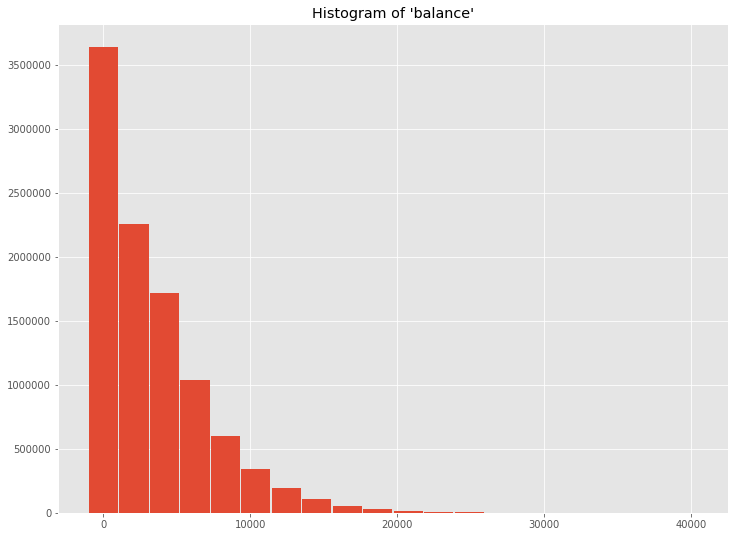

In [62]:
data = {
    'bins': hists[0][:-1],
    'freq': hists[1]
}

fig = plt.figure(figsize=(12,9))
ax = fig.add_subplot(1, 1, 1)
ax.bar(data['bins'], data['freq'], width=2000)
ax.set_title('Histogram of \'balance\'')

plt.savefig('B05793_05_22.png', dpi=300)